# EDA - Ejercicio - Churn

**Contexto**  
Este conjunto de datos contiene el detalle de clientes de un banco y una variable binaria, que refleja si el cliente cerró su cuenta / continúa siendo cliente.

**Contenido**  
El conjunto de datos proviene de kaggle: [Churn Modelling](https://www.kaggle.com/datasets/shrutimechlearn/churn-modelling).  
Contiene 10,000 renglones con las siguientes columnas:  

| Variable        | Definición                                                           | Valor          |
| --------------- | -------------------------------------------------------------------- | -------------- |
| RowNumber       | Número de renglón                                                    | Numérico       |
| CustomerId      | Id cliente                                                           | Numérico       |
| Surname         | Apellido del cliente                                                 | String         |
| CreditScore     | Calificación crediticia                                              | Numérico       |
| Geography       | Pais al que pertenece el cliente                                     | String         |
| Gender          | Género del cliente                                                   | Female, Male   |
| Age             | Edad del cliente                                                     | Años           |
| Tenure          | Número de años de permanencia del cliente                            | Años           |
| Balance         | Balance del cliente                                                  | Numérico       |
| NumOfProducts   | Número de productos que utiliza el cliente                           | Numérico       |
| HasCrCard       | Si el cliente tiene tarjeta de crédito con el banco                  | 0 = No, 1 = Si |
| IsActiveMember  | Si el cliente es un miembro activo del banco                         | 0 = No, 1 = Si |
| EstimatedSalary | Sueldo estimado del cliente                                          | USD            |
| Exited          | Si el cliente canceló la cuenta con el banco **(variable objetivo)** | 0 = No, 1 = Si |

**Planteamiento del problema**  
Se busca predecir si el cliente cancelará su cuenta, de acuerdo sus las características.

In [1]:
# Importar librerias
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler

## Cargar Datos

In [2]:
# Importar los datos
df = pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
# Renombrar columnas
df.columns = ['num_renglon', 'id_cliente', 'apellido', 'calificacion_credito', 'geografia', 'genero',
              'edad', 'permanencia', 'balance', 'num_productos', 'tarjeta', 'activo', 'sueldo', 'cancelacion']

## Mapeos

In [4]:
print(df['geografia'].unique())

['France' 'Spain' 'Germany']


In [5]:
# Mapeos
df.replace('France',   '0', inplace=True)
df.replace('Spain',    '1', inplace=True)
df.replace('Germany',  '2', inplace=True)
df = df.astype({'geografia':'int'})
df.head()

,num_renglon,id_cliente,apellido,calificacion_credito,geografia,genero,edad,permanencia,balance,num_productos,tarjeta,activo,sueldo,cancelacion
0,1,15634602,Hargrave,619,0,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
print(df['genero'].unique())

['Female' 'Male']


In [7]:
df.replace('Female', '0', inplace=True)
df.replace('Male',   '1', inplace=True)
df = df.astype({'genero':'int'})
df.head()

,num_renglon,id_cliente,apellido,calificacion_credito,geografia,genero,edad,permanencia,balance,num_productos,tarjeta,activo,sueldo,cancelacion
0,1,15634602,Hargrave,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,1,0,43,2,125510.82,1,1,1,79084.10,0


In [8]:
# Seleccionar columnas
df = df[['calificacion_credito', 'geografia', 'genero', 'edad', 'permanencia', 'balance', 
         'num_productos', 'tarjeta', 'activo', 'sueldo', 'cancelacion']]
df.head()

,calificacion_credito,geografia,genero,edad,permanencia,balance,num_productos,tarjeta,activo,sueldo,cancelacion
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


## EDA

In [ ]:
# Revisar los datos
## Escribe tu código aqui

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   calificacion_credito  10000 non-null  int64  
 1   geografia             10000 non-null  int32  
 2   genero                10000 non-null  int32  
 3   edad                  10000 non-null  int64  
 4   permanencia           10000 non-null  int64  
 5   balance               10000 non-null  float64
 6   num_productos         10000 non-null  int64  
 7   tarjeta               10000 non-null  int64  
 8   activo                10000 non-null  int64  
 9   sueldo                10000 non-null  float64
 10  cancelacion           10000 non-null  int64  
dtypes: float64(2), int32(2), int64(7)
memory usage: 781.4 KB


In [ ]:
## Escribe tu código aqui

,calificacion_credito,geografia,genero,edad,permanencia,balance,num_productos,tarjeta,activo,sueldo,cancelacion
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,0.749500,0.545700,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,0.830433,0.497932,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,0.000000,0.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,0.000000,0.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,0.000000,1.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,2.000000,1.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,2.000000,1.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [ ]:
# Revisar las relaciones entre los datos
## Escribe tu código aqui

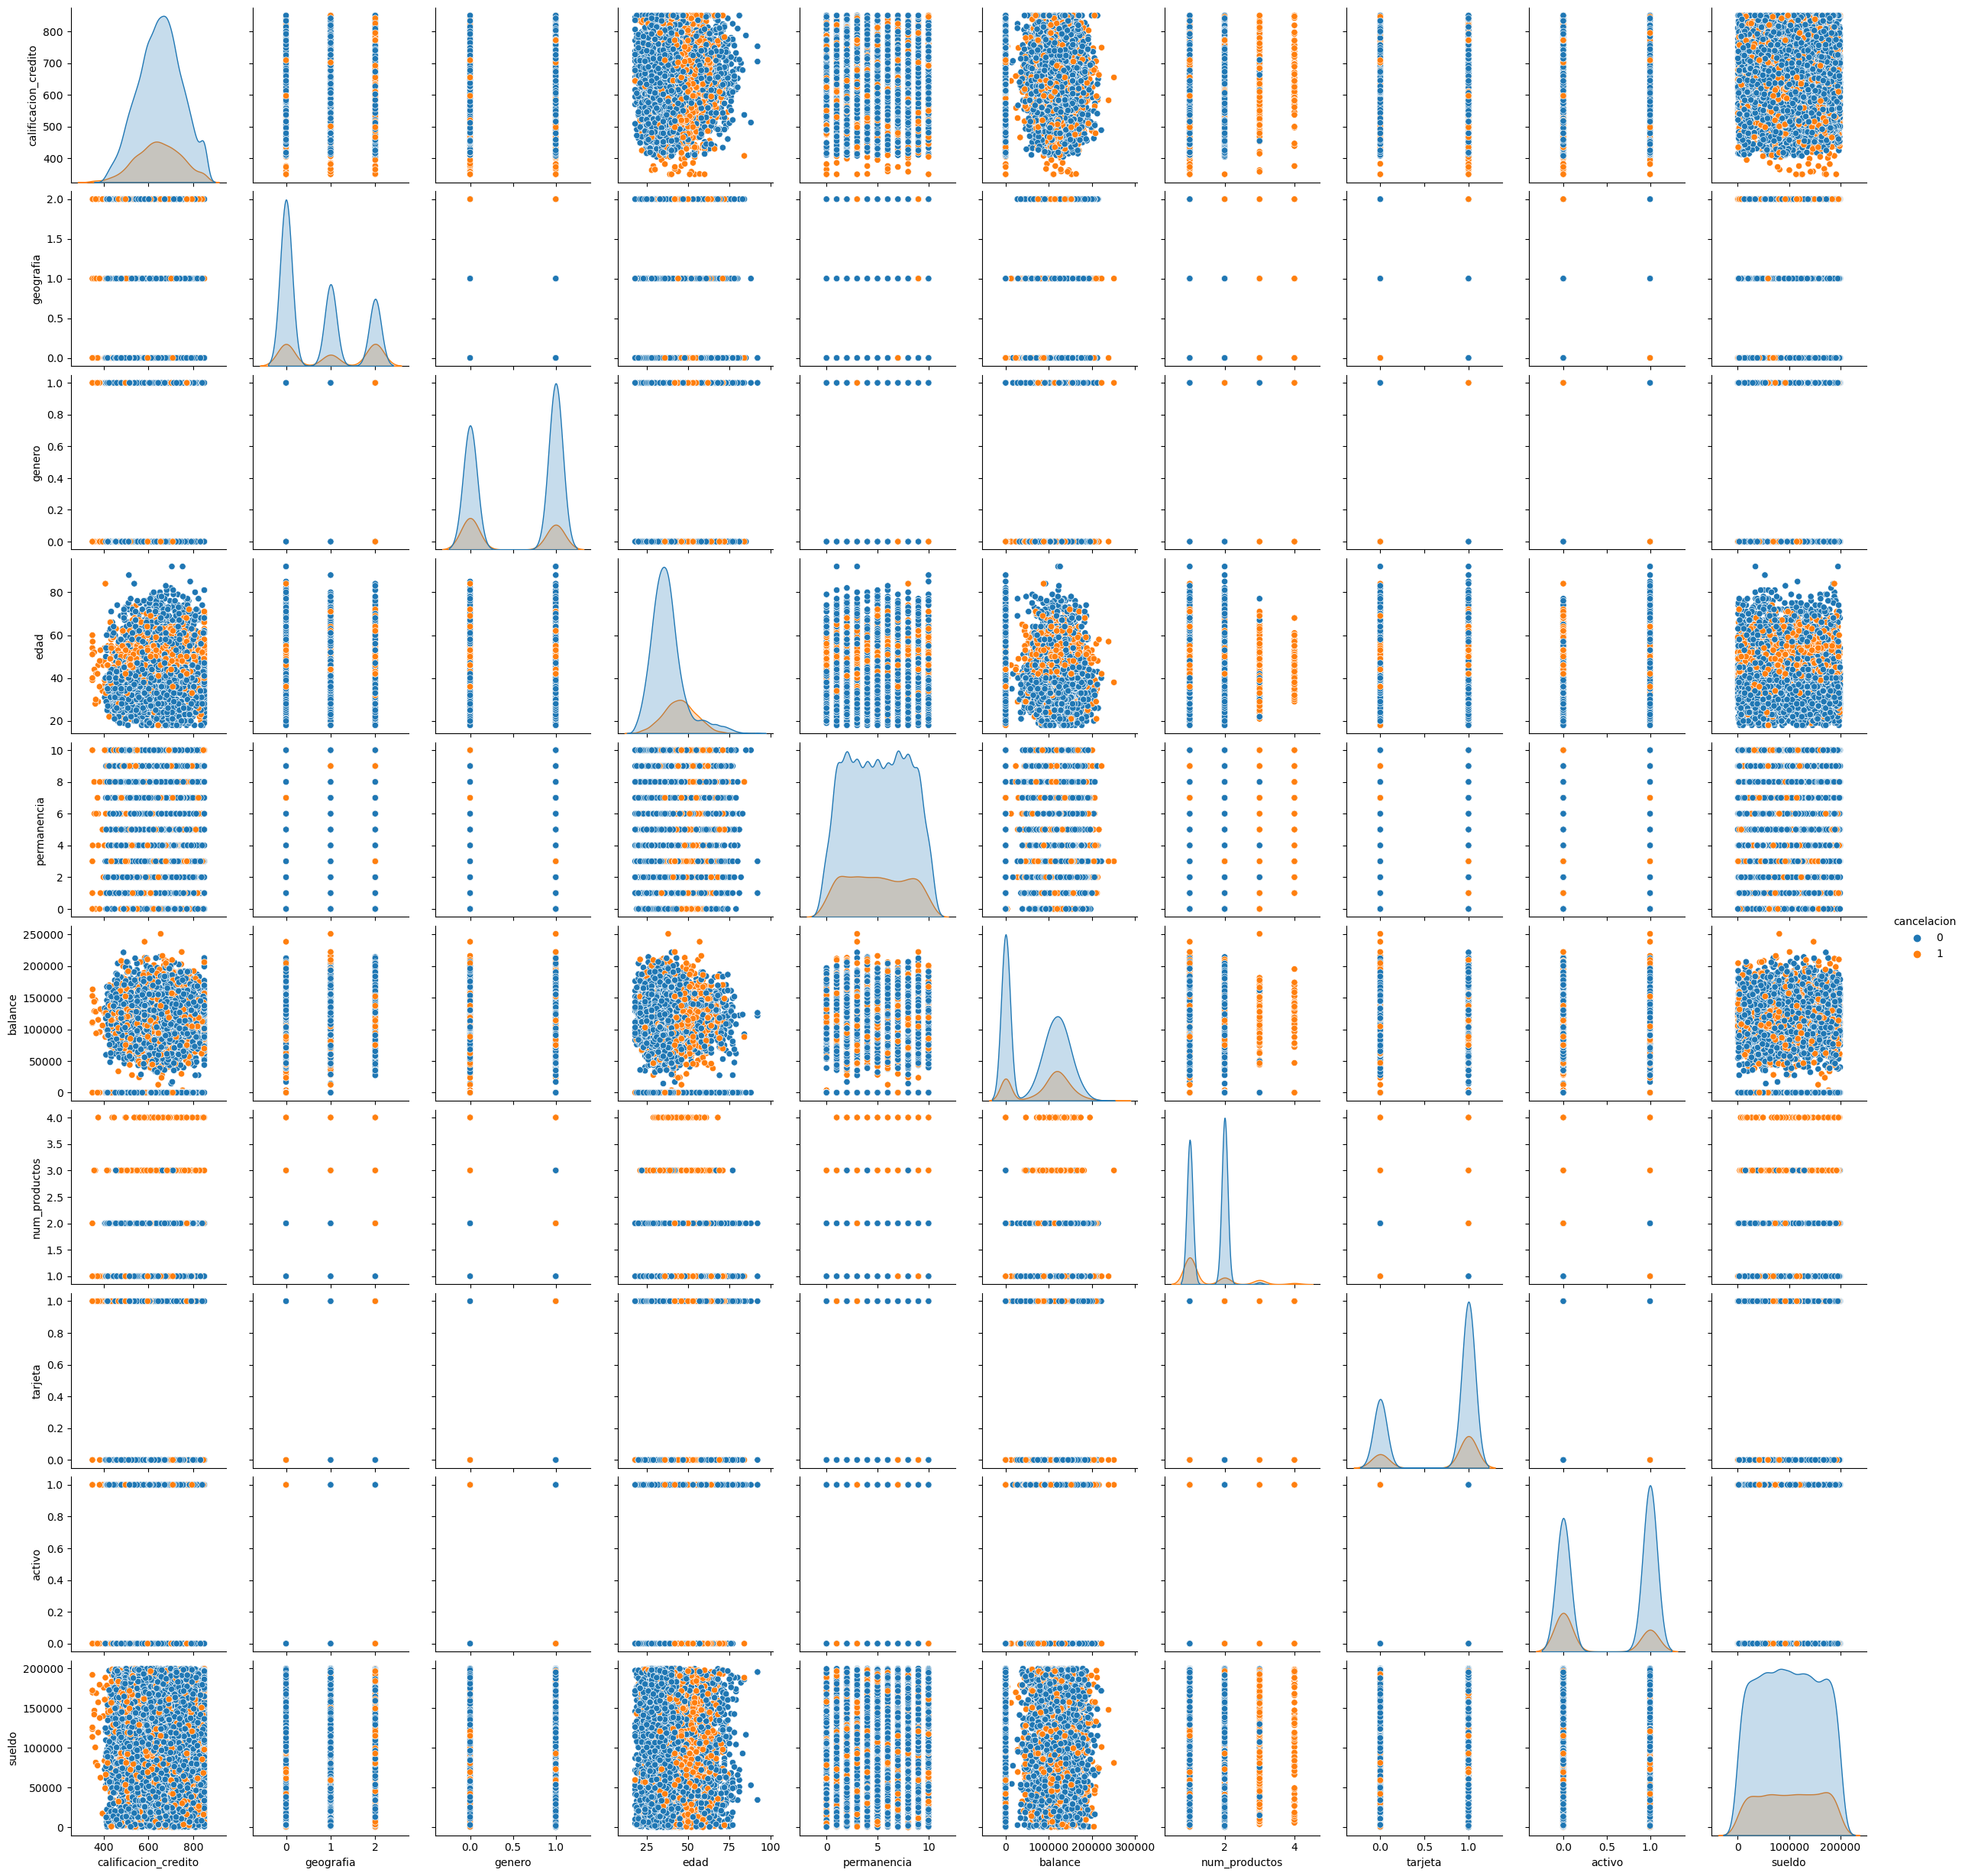

In [ ]:
## Escribe tu código aqui

<Axes: >

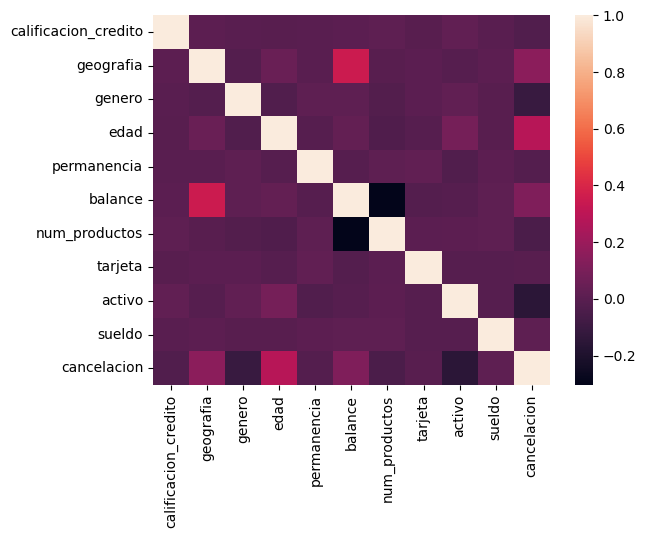

## Normalización

In [13]:
# Variables independientes
X = df[['calificacion_credito', 'geografia', 'genero', 'edad', 'permanencia', 'balance', 
         'num_productos', 'tarjeta', 'activo', 'sueldo']]
X.head()

,calificacion_credito,geografia,genero,edad,permanencia,balance,num_productos,tarjeta,activo,sueldo
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,1,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,1,0,43,2,125510.82,1,1,1,79084.10


In [14]:
# Normalizar
scaler = StandardScaler()
X_adj = scaler.fit_transform(X)
print(X_adj)

[[-0.32622142 -0.9025865  -1.09598752 ...  0.64609167  0.97024255
   0.02188649]
 [-0.44003595  0.301665   -1.09598752 ... -1.54776799  0.97024255
   0.21653375]
 [-1.53679418 -0.9025865  -1.09598752 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.60498839 -0.9025865  -1.09598752 ... -1.54776799  0.97024255
  -1.00864308]
 [ 1.25683526  1.50591651  0.91241915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 1.46377078 -0.9025865  -1.09598752 ...  0.64609167 -1.03067011
  -1.07636976]]


In [15]:
# Variable dependiente
y = df['cancelacion']
y.head()

0    1
1    0
2    1
3    0
4    0
Name: cancelacion, dtype: int64

In [16]:
print('X:', len(X_adj), 'y:', len(y))

X: 10000 y: 10000
